In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [2]:
import pandas as pd
accident = pd.read_csv (r"C:\Users\LENOVO\Desktop\Projects\Logistics Regression\Road accident severity\RTA Dataset.csv")

#first few rows
accident.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [3]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [4]:
accident.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [5]:
accident.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [9]:
for column in ['Educational_level','Vehicle_driver_relation','Driving_experience','Type_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle','Defect_of_vehicle','Area_accident_occured','Lanes_or_Medians','Road_allignment','Types_of_Junction','Road_surface_type','Type_of_collision','Vehicle_movement','Work_of_casuality','Fitness_of_casuality',]:
    accident[column].fillna(accident[column].mode()[0], inplace=True)

In [10]:
print(accident.isnull().sum())

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

Number_of_vehicles_involved       AxesSubplot(0.125,0.653529;0.227941x0.226471)
Number_of_casualties           AxesSubplot(0.398529,0.653529;0.227941x0.226471)
dtype: object

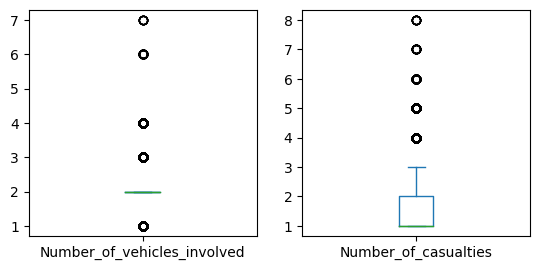

In [11]:
accident.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10))

In [13]:
q1 = accident['Number_of_vehicles_involved'].quantile(0.25)
q3 = accident['Number_of_vehicles_involved'].quantile(0.75)
iqr = q3-q1 #Interquartile range

#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

2.0

In [14]:
accident['Number_of_vehicles_involved']=np.where(accident['Number_of_vehicles_involved'] > upper_limit,upper_limit,accident['Number_of_vehicles_involved']) # upper limit

In [15]:
q1 = accident['Number_of_vehicles_involved'].quantile(0.25)
q3 = accident['Number_of_vehicles_involved'].quantile(0.75)
iqr = q3-q1 #Interquartile range

low_limit = q1-1.5*iqr #acceptable range
# upper_limit = q3+1.5*iqr #acceptable range
low_limit

2.0

In [16]:
accident['Number_of_vehicles_involved']=np.where(accident['Number_of_vehicles_involved'] < upper_limit,upper_limit,accident['Number_of_vehicles_involved']) # lower limit

In [17]:
q1 = accident['Number_of_casualties'].quantile(0.25)
q3 = accident['Number_of_casualties'].quantile(0.75)
iqr = q3-q1 #Interquartile range

#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

3.5

In [18]:
accident['Number_of_casualties']=np.where(accident['Number_of_casualties'] > upper_limit,upper_limit,accident['Number_of_casualties']) # upper limit

Number_of_vehicles_involved       AxesSubplot(0.125,0.653529;0.227941x0.226471)
Number_of_casualties           AxesSubplot(0.398529,0.653529;0.227941x0.226471)
dtype: object

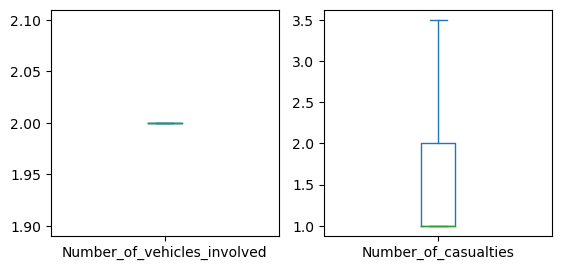

In [19]:
accident.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10))

In [20]:
accident.Accident_severity.value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

In [21]:
import plotly.express as px

fig = px.pie(accident,names='Accident_severity',color='Accident_severity',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

In [23]:
accident.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [25]:
accident=accident.drop('Time',axis=1)
accident.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [26]:
accident=accident.drop('Educational_level',axis=1)
accident.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,Recreational areas,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,Office areas,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,Industrial areas,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [27]:
accident.select_dtypes(include=[np.number]).columns.tolist()

['Number_of_vehicles_involved', 'Number_of_casualties']

In [28]:
# Qualitative Variable
Quantitative_Variable = accident[accident.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,Number_of_vehicles_involved,Number_of_casualties
0,2.0,2.0
1,2.0,2.0
2,2.0,2.0


In [29]:
Qualitative_Variable = accident[accident.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,Recreational areas,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury


In [30]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,1,0,1,0,0,0,3,3,2,9,...,2,3,2,5,3,0,2,5,9,2
1,1,1,1,0,3,11,3,2,2,6,...,2,3,2,5,3,0,2,5,16,2
2,1,0,1,0,0,5,3,5,2,1,...,2,0,1,1,2,0,2,5,0,1
3,3,0,1,0,2,11,0,5,2,6,...,2,2,0,0,2,0,2,5,1,2
4,3,0,1,0,1,0,3,2,2,4,...,2,3,2,5,3,0,2,5,16,2


In [31]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Number_of_vehicles_involved,Number_of_casualties
0,1,0,1,0,0,0,3,3,2,9,...,2,5,3,0,2,5,9,2,2.0,2.0
1,1,1,1,0,3,11,3,2,2,6,...,2,5,3,0,2,5,16,2,2.0,2.0
2,1,0,1,0,0,5,3,5,2,1,...,1,1,2,0,2,5,0,1,2.0,2.0
3,3,0,1,0,2,11,0,5,2,6,...,0,0,2,0,2,5,1,2,2.0,2.0
4,3,0,1,0,1,0,3,2,2,4,...,2,5,3,0,2,5,16,2,2.0,2.0


In [32]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('Accident_severity', axis = 1)
Y = Final_combined[['Accident_severity']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

In [33]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Number_of_vehicles_involved,Number_of_casualties,Accident_severity
1143,0,1,1,0,4,7,3,5,2,6,...,1,1,1,3,2,5,11,2.0,3.5,2
406,2,0,1,2,2,8,3,5,2,7,...,2,5,3,0,2,5,3,2.0,2.0,2
10822,0,0,1,0,1,8,3,3,2,9,...,2,5,3,0,2,5,10,2.0,1.0,1
3283,4,1,1,0,0,5,3,5,2,2,...,1,0,2,0,2,5,11,2.0,1.0,2
76,5,2,1,0,0,4,3,2,2,6,...,1,1,2,0,2,5,1,2.0,1.0,1


### Model building

# Hypothesis

* H0 :- There is no log linear relationship between Loan_Status and all independent Variable

Vs 

* H1 :- There is log linear relationship between Loan_Status and all independent Variable

Alpha = 0.05 (5%)

In [35]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model = output

In [36]:
output.intercept_ # beta

array([-0.15530062, -0.07568571,  0.23098633])

In [37]:
output.coef_  # Beta 1 -- 

array([[ 0.0339025 , -0.10229024, -0.12013515,  0.14409011, -0.10560597,
         0.01427897, -0.05245245,  0.04412106, -0.23058638,  0.00942129,
         0.06097337, -0.0468452 ,  0.00408524, -0.10410476, -0.03838535,
        -0.11870073, -0.11897544, -0.05235297,  0.00649203, -0.05655987,
         0.18724551, -0.03449195, -0.09968011, -0.02754471, -0.20253828,
        -0.06783132,  0.00425517, -0.30544032,  0.50696104],
       [-0.01307238,  0.04751674, -0.01943117, -0.06618417,  0.05698973,
        -0.00541786,  0.05680109, -0.01687404, -0.06485512,  0.00531726,
        -0.02585492,  0.0275985 ,  0.00567535,  0.06455526,  0.01336356,
         0.05676007,  0.05241994,  0.01172001,  0.00596431,  0.02339719,
        -0.04904144, -0.01454641,  0.09744507,  0.00973533,  0.17863686,
         0.01418825, -0.00234233, -0.14628832, -0.25750414],
       [-0.02083012,  0.0547735 ,  0.13956632, -0.07790594,  0.04861624,
        -0.00886111, -0.00434865, -0.02724701,  0.2954415 , -0.01473855,
  

In [38]:
output.feature_names_in_

array(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty',
       'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident',
       'Number_of_vehicles_involved', 'Number_of_casualties'],
      dtype=object)

In [39]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Number_of_vehicles_involved,Number_of_casualties,Accident_severity
1143,0,1,1,0,4,7,3,5,2,6,...,1,1,1,3,2,5,11,2.0,3.5,2
406,2,0,1,2,2,8,3,5,2,7,...,2,5,3,0,2,5,3,2.0,2.0,2
10822,0,0,1,0,1,8,3,3,2,9,...,2,5,3,0,2,5,10,2.0,1.0,1
3283,4,1,1,0,0,5,3,5,2,2,...,1,0,2,0,2,5,11,2.0,1.0,2
76,5,2,1,0,0,4,3,2,2,6,...,1,1,2,0,2,5,1,2.0,1.0,1


In [40]:
train['Predicted']=output.predict(X_train)
train.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Predicted
1143,0,1,1,0,4,7,3,5,2,6,...,1,1,3,2,5,11,2.0,3.5,2,2
406,2,0,1,2,2,8,3,5,2,7,...,5,3,0,2,5,3,2.0,2.0,2,2
10822,0,0,1,0,1,8,3,3,2,9,...,5,3,0,2,5,10,2.0,1.0,1,2
3283,4,1,1,0,0,5,3,5,2,2,...,0,2,0,2,5,11,2.0,1.0,2,2
76,5,2,1,0,0,4,3,2,2,6,...,1,2,0,2,5,1,2.0,1.0,1,2


### Model Performance Metrics

In [41]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Accident_severity'])
matrix

array([[   0,    0,    0],
       [   0,    0,    0],
       [ 123, 1386, 8343]], dtype=int64)

In [42]:
Accuracy_Train=(8343 + 0) / (8343 + 0 + 0 + 1509)
print(Accuracy_Train)

0.8468331303288672


* Accuracy of Model is 85% , So we say Model good fit data  

In [43]:
from sklearn.metrics import classification_report
print(classification_report(train['Accident_severity'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.00      0.00      0.00      1386
           2       0.85      1.00      0.92      8343

    accuracy                           0.85      9852
   macro avg       0.28      0.33      0.31      9852
weighted avg       0.72      0.85      0.78      9852



### Predictions on Test Dataset

In [44]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Number_of_vehicles_involved,Number_of_casualties,Accident_severity
10635,0,1,1,0,2,8,3,5,2,7,...,2,5,3,3,2,5,16,2.0,1.0,2
11392,6,1,0,2,2,5,3,1,2,6,...,2,5,3,0,2,5,3,2.0,1.0,2
8266,3,0,1,0,2,0,3,5,2,9,...,1,0,2,0,2,5,3,2.0,1.0,2
11046,4,0,1,0,1,9,3,3,2,2,...,1,1,2,3,2,5,9,2.0,2.0,1
565,3,0,2,2,4,14,3,5,2,7,...,0,4,2,0,2,5,9,2.0,2.0,1


In [45]:
test['Predicted']=output.predict(X_test)
test.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Predicted
10635,0,1,1,0,2,8,3,5,2,7,...,5,3,3,2,5,16,2.0,1.0,2,2
11392,6,1,0,2,2,5,3,1,2,6,...,5,3,0,2,5,3,2.0,1.0,2,2
8266,3,0,1,0,2,0,3,5,2,9,...,0,2,0,2,5,3,2.0,1.0,2,2
11046,4,0,1,0,1,9,3,3,2,2,...,1,2,3,2,5,9,2.0,2.0,1,2
565,3,0,2,2,4,14,3,5,2,7,...,4,2,0,2,5,9,2.0,2.0,1,2


### Model Performance Metrics on Test data

In [46]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Accident_severity'])
print(matrix)

[[   0    0    0]
 [   0    0    0]
 [  35  357 2072]]


In [47]:
Accuracy_test=(2072 + 0) / (2072 + 0 + 0 + 392)
Accuracy_test

0.8409090909090909

In [48]:
from sklearn.metrics import classification_report
print(classification_report(test['Accident_severity'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.00      0.00      0.00       357
           2       0.84      1.00      0.91      2072

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.71      0.84      0.77      2464



* Accuracy of Model is 84%,Hence Model is good Fit